In [1]:
!pip install opencv-contrib-python

In [2]:
import cv2
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime as dt

In [3]:
%matplotlib inline

In [4]:
def order_pics(pics):
    ordered_pics = []
    ordered_targ = []
    for i in range(41):
        num = i + 1
        for pic in pics:
            if int(pic.split('_')[1].replace('.jpg','')) == num:
                ordered_pics.append(pic)
                ordered_targ.append(num)
    return ordered_pics, ordered_targ

In [5]:
def load_images_from_folder(folder):
    images = []
    pics = os.listdir(folder)
    pics, target = order_pics(pics)
    for filename in pics:
        img = cv2.imread(os.path.join(folder,filename)) # read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
        img = cv2.resize(img, (80, 80), interpolation = cv2.INTER_AREA) # resize to 80x80
        if img is not None:
            images.append(img)
    return images, target

In [6]:
folder = './orl_images'
X, y = load_images_from_folder(folder)

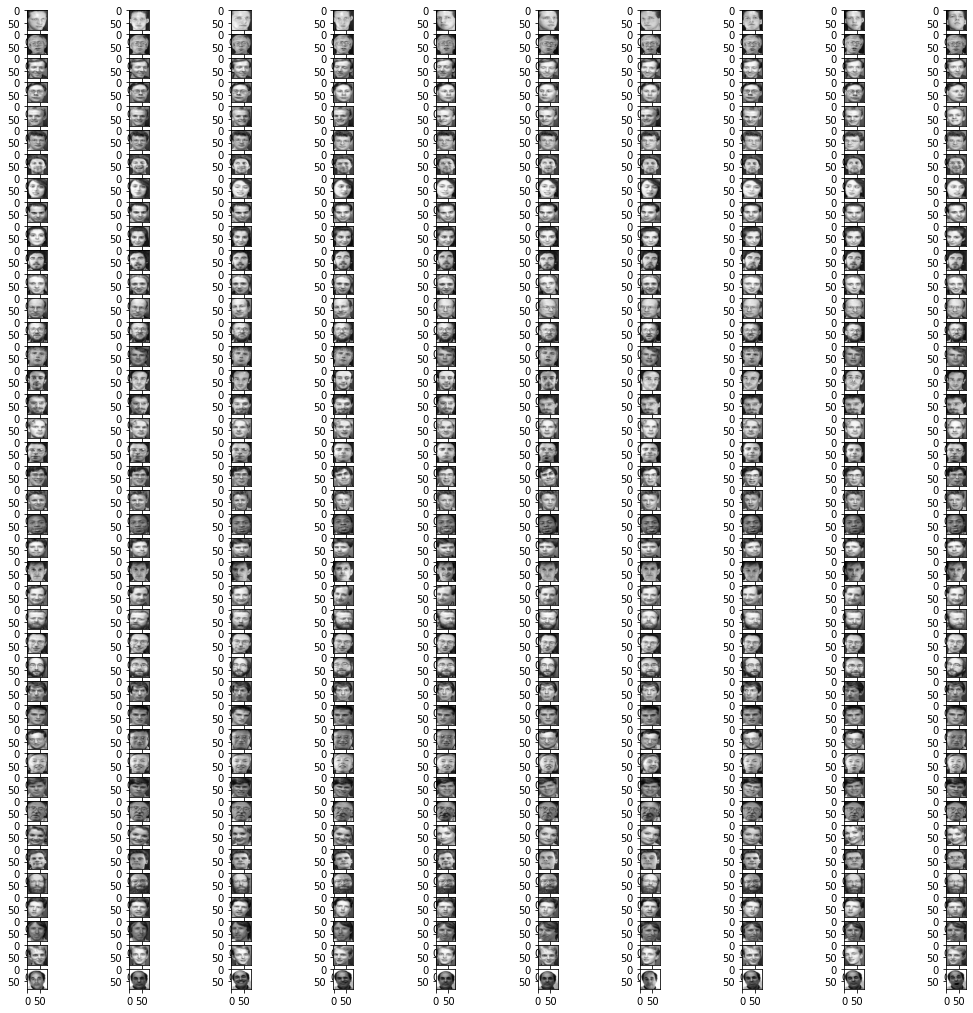

In [7]:
fig, axes = plt.subplots(41, 10, figsize=(18, 18))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X)[i].reshape(80, 80), cmap='gray')

In [8]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()
for i in range(0, len(X), 10): # starts on index zero until the length of X for each 10
    person_X = X[i:i+10]
    person_y = y[i:i+10]
    X_train_Person, X_test_Person, y_train_Person, y_test_Person = train_test_split(person_X, person_y, test_size=0.3, random_state=14)
    X_train.extend(X_train_Person)
    X_test.extend(X_test_Person)
    y_train.extend(y_train_Person)
    y_test.extend(y_test_Person)

In [9]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

In [10]:
X_train1.shape

(287, 80, 80)

In [11]:
X_train1 = X_train1.reshape(287,80*80)

In [12]:
X_test1 = np.array(X_test)
y_test1 = np.array(y_test)

In [13]:
X_test1 = X_test1.reshape(123, 80*80)

In [14]:
X_test1.shape

(123, 6400)

In [15]:
y_train1.shape

(287,)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier()

In [45]:
start = time.time()
clf.fit(X_train1,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2.2629473209381104


In [46]:
clf.score(X_test1, y_test)

0.967479674796748

In [47]:
from sklearn import svm

In [48]:
clf1 = svm.SVC()

In [49]:
start = time.time()
clf1.fit(X_train1,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.35505032539367676


In [50]:
clf1.score(X_test1, y_test)

0.959349593495935

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [53]:
start = time.time()
neigh.fit(X_train1, y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.0009975433349609375


In [54]:
neigh.score(X_test1, y_test)

0.943089430894309

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
clf2 = LinearDiscriminantAnalysis()

In [57]:
start = time.time()
clf2.fit(X_train1,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.34108734130859375


In [58]:
clf2.score(X_test1, y_test)

0.975609756097561

In [59]:
from sklearn import tree

In [60]:
clf3 = tree.DecisionTreeClassifier()

In [61]:
start = time.time()
clf3.fit(X_train1, y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 3.262275457382202


In [62]:
clf3.score(X_test1,y_test)

0.6504065040650406

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()

In [38]:
start = time.time()
y_pred = gnb.fit(X_train1, y_train).predict(X_test1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.3321070671081543


In [39]:
gnb.score(X_test1, y_test)

0.8943089430894309